1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
size = 1000
x1 = np.random.normal(loc=0, scale=1, size=size)
x2 = x1 + np.random.normal(loc=0, scale=np.sqrt(3), size=size)
x3 = 2*x1 + x2

In [4]:
df = pd.DataFrame()
df['x1'] = x1
df['x2'] = x2
df['x3'] = x3
df.head(5)

,x1,x2,x3
0,1.448006,3.809834,6.705847
1,-0.002405,-1.161187,-1.165997
2,0.063591,-1.813308,-1.686125
3,-2.273528,-1.418100,-5.965157
4,1.276355,0.327501,2.880211


In [6]:
cov_matrix = np.cov(df.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_matrix)

print("Eigenvalues")
print(eigen_vals, '\n')
print("Eigenvectors as columns")
print(eigen_vecs)

Eigenvalues
[1.51267155e+01 7.98419249e-16 1.05603931e+00] 

Eigenvectors as columns
[[-0.20171128 -0.81649658  0.54096755]
 [-0.46083596 -0.40824829 -0.78801241]
 [-0.86425851  0.40824829  0.2939227 ]]


In [14]:
U, s, V = np.linalg.svd(df.T, full_matrices=True)
print("Eigenvalues")
print(s, '\n')
print("Eigenvectors as columns")
print(U)

Eigenvalues
[1.51267155e+01 7.98419249e-16 1.05603931e+00] 

Eigenvectors as columns
[[-0.20171128 -0.81649658  0.54096755]
 [-0.46083596 -0.40824829 -0.78801241]
 [-0.86425851  0.40824829  0.2939227 ]]


In [20]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df)
pca_df = pd.DataFrame(data=pca_features, columns=['PC1', 'PC2'])
pca_df

,PC1,PC2
0,-7.976532,0.282848
1,1.410165,-0.536040
2,2.146898,-0.932743
3,6.134386,1.900696
4,-3.030787,-1.243975
...,...,...
995,0.809352,2.034892
996,4.912609,-1.756971
997,-0.160097,0.494231
998,1.671061,0.247967


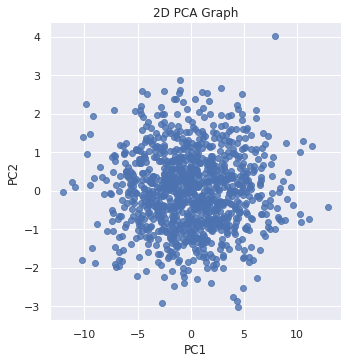

In [21]:
import seaborn as sns
sns.set()
 
sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca_df, 
    fit_reg=False, 
    legend=True
    )
 
plt.title('2D PCA Graph')
plt.show()

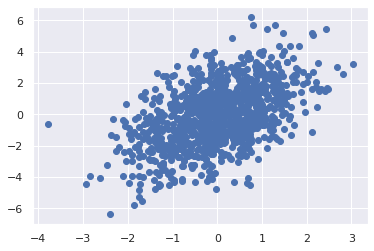

In [24]:
plt.scatter(df['x1'], df['x2'])
plt.show()

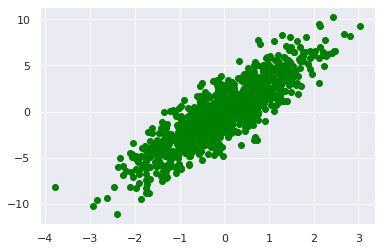

In [25]:
plt.scatter(df['x1'], df['x3'], c='green')
plt.show()

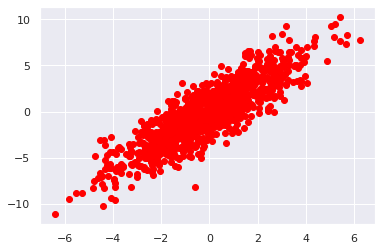

In [26]:
plt.scatter(df['x2'], df['x3'], c='red')
plt.show()

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [27]:
x1_noisy = x1 + np.random.normal(loc=0, scale=0.001)
x2_noisy = x2 + np.random.normal(loc=0, scale=0.001)
x3_noisy = x3 + np.random.normal(loc=0, scale=0.001)
df_noisy = pd.DataFrame(None)
df_noisy['x1'] = x1_noisy
df_noisy['x2'] = x2_noisy
df_noisy['x3'] = x3_noisy
df_noisy.head(5)

,x1,x2,x3
0,1.449094,3.809673,6.706526
1,-0.001317,-1.161348,-1.165318
2,0.064679,-1.813469,-1.685446
3,-2.272441,-1.418261,-5.964478
4,1.277442,0.327340,2.880890


In [28]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df_noisy)
pca_df = pd.DataFrame(data=pca_features, columns=['PC1', 'PC2'])
pca_df

,PC1,PC2
0,-7.976532,0.282848
1,1.410165,-0.536040
2,2.146898,-0.932743
3,6.134386,1.900696
4,-3.030787,-1.243975
...,...,...
995,0.809352,2.034892
996,4.912609,-1.756971
997,-0.160097,0.494231
998,1.671061,0.247967


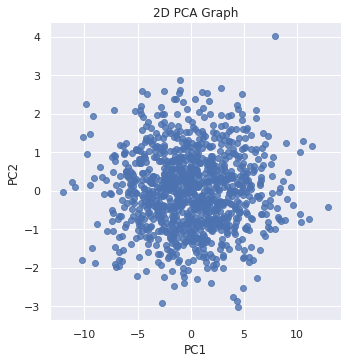

In [29]:
sns.set()
 
sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca_df, 
    fit_reg=False, 
    legend=True
    )
 
plt.title('2D PCA Graph')
plt.show()

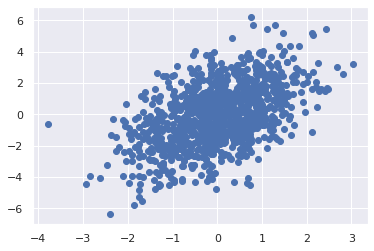

In [30]:
plt.scatter(df_noisy['x1'], df_noisy['x2'])
plt.show()

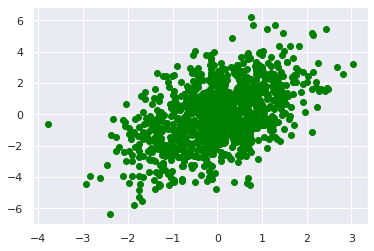

In [31]:
plt.scatter(df_noisy['x1'], df_noisy['x2'], c='green')
plt.show()

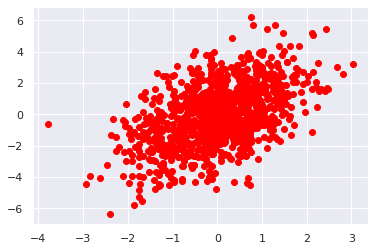

In [32]:
plt.scatter(df_noisy['x1'], df_noisy['x2'], c='red')
plt.show()

Comparison:
PCA can extract the signals from the noise rather well and is not sensitive to type of noise, magnitude and correlation, when the input data are correctly handled by a proper pre-normalization. That is why the results are of a same shape of the previous one.

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [33]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

--2023-01-17 21:31:47--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1477391 (1.4M) [application/x-httpd-php]
Saving to: ‘data/magic04.data’

magic04.data        100%[===================>]   1.41M  2.96MB/s    in 0.5s    

2023-01-17 21:31:48 (2.96 MB/s) - ‘data/magic04.data’ saved [1477391/1477391]



In [38]:
data = pd.read_csv("/content/data/magic04.data")
data.columns = [f'c{i}' for i in range(len(data.columns))]
data = data.drop(['c10'], axis=1)
data

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980
...,...,...,...,...,...,...,...,...,...,...
19014,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258
19015,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560
19016,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166
19017,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166


In [39]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(data)
pca_df = pd.DataFrame(data=pca_features, columns=['PC1', 'PC2'])
pca_df

,PC1,PC2
0,-10.038143,-39.383725
1,58.815390,-40.775092
2,-86.691044,12.506798
3,147.272088,-75.055496
4,15.048810,-77.877203
...,...,...
19014,-92.059271,13.533765
19015,16.849797,-49.243065
19016,63.154157,-34.649710
19017,211.445642,-17.468521


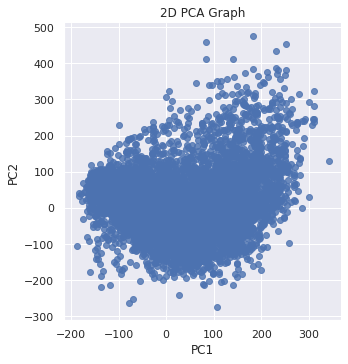

In [40]:
sns.set()
 
sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca_df, 
    fit_reg=False, 
    legend=True
    )
 
plt.title('2D PCA Graph')
plt.show()

In [41]:
pca = PCA(n_components=3)
pca_features = pca.fit_transform(data)
pca_df = pd.DataFrame(data=pca_features, columns=['PC1', 'PC2', 'PC3'])
pca_df

,PC1,PC2,PC3
0,-10.038143,-39.383725,7.967874
1,58.815390,-40.775092,136.307491
2,-86.691044,12.506798,16.223333
3,147.272088,-75.055496,14.827696
4,15.048810,-77.877203,11.006297
...,...,...,...
19014,-92.059271,13.533765,-6.943368
19015,16.849797,-49.243065,35.283073
19016,63.154157,-34.649710,-16.010639
19017,211.445642,-17.468521,131.601845


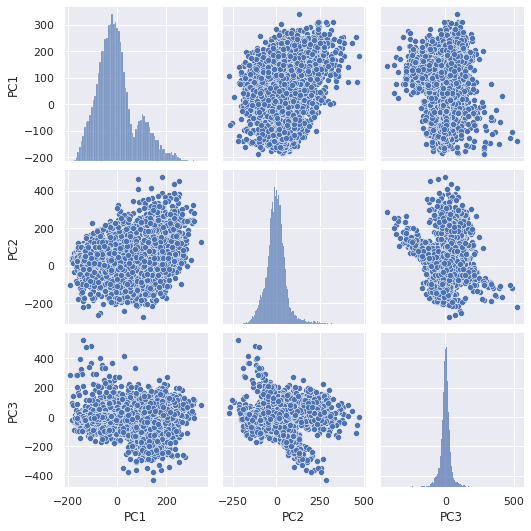

In [43]:
sns.pairplot(pca_df)
plt.show()